Data Processing:

In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error


In [73]:
# Loading the CSV files
confirmed_cases_df = pd.read_csv("time_series_covid19_confirmed_US.csv")
deaths_df = pd.read_csv("time_series_covid19_deaths_US.csv")

In [74]:
confirmed_cases_df.columns


Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1154)

In [75]:
deaths_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1155)

In [76]:
# Selecting essential columns for confirmed cases dataframe
confirmed_cases_df = confirmed_cases_df[["Combined_Key", "Admin2", "Province_State", "Country_Region",
                                         '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23',
                                         '3/6/23', '3/7/23', '3/8/23', '3/9/23']]

# Selecing essential columns for deaths dataframe
deaths_df = deaths_df[["Combined_Key", "Admin2", "Province_State", "Country_Region",
                       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23',
                       '3/6/23', '3/7/23', '3/8/23', '3/9/23']]


In [77]:
# Exploring data
confirmed_cases_df.describe()
deaths_df.describe()

,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,855.000000,855.000000,855.00000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,475.502924,475.997661,476.45848,476.932164,476.938012,476.938012,476.938012,476.947368,477.219883,477.557895
std,1711.390800,1712.067482,1714.38494,1714.659008,1714.659243,1714.659243,1714.669467,1714.668893,1714.921243,1717.535679
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,52.000000,52.50000,52.500000,52.500000,52.500000,52.500000,52.500000,52.500000,52.500000
50%,118.000000,118.000000,119.00000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
75%,315.500000,316.000000,316.50000,317.500000,317.500000,317.500000,317.500000,317.500000,318.500000,318.500000
max,35366.000000,35366.000000,35453.00000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35453.000000,35545.000000


In [78]:
# checking for missing values
confirmed_cases_df.isnull().sum()

Combined_Key      0
Admin2            2
Province_State    0
Country_Region    0
2/28/23           1
3/1/23            1
3/2/23            1
3/3/23            1
3/4/23            1
3/5/23            1
3/6/23            1
3/7/23            1
3/8/23            1
3/9/23            1
dtype: int64

In [79]:
# checking for missing values
deaths_df.isnull().sum()

Combined_Key      0
Admin2            4
Province_State    0
Country_Region    0
2/28/23           1
3/1/23            1
3/2/23            1
3/3/23            1
3/4/23            1
3/5/23            1
3/6/23            1
3/7/23            1
3/8/23            1
3/9/23            1
dtype: int64

In [80]:
# Calculating the percentage of missing values for confirmed cases dataframe
confirmed_cases_missing_percentage = (confirmed_cases_df.isnull().mean() * 100).round(2)

# Calculating the percentage of missing values for deaths dataframe
deaths_missing_percentage = (deaths_df.isnull().mean() * 100).round(2)

# Displaying the results
print("Percentage of missing values for confirmed cases dataframe:")
print(confirmed_cases_missing_percentage)
print("\nPercentage of missing values for deaths dataframe:")
print(deaths_missing_percentage)


Percentage of missing values for confirmed cases dataframe:
Combined_Key      0.00
Admin2            0.35
Province_State    0.00
Country_Region    0.00
2/28/23           0.18
3/1/23            0.18
3/2/23            0.18
3/3/23            0.18
3/4/23            0.18
3/5/23            0.18
3/6/23            0.18
3/7/23            0.18
3/8/23            0.18
3/9/23            0.18
dtype: float64

Percentage of missing values for deaths dataframe:
Combined_Key      0.00
Admin2            0.47
Province_State    0.00
Country_Region    0.00
2/28/23           0.12
3/1/23            0.12
3/2/23            0.12
3/3/23            0.12
3/4/23            0.12
3/5/23            0.12
3/6/23            0.12
3/7/23            0.12
3/8/23            0.12
3/9/23            0.12
dtype: float64


In [81]:
# Forward filling missing values for confirmed cases dataframe
confirmed_cases_df['Admin2'].fillna(method='ffill', inplace=True)

# Forward filling missing values for deaths dataframe
deaths_df['Admin2'].fillna(method='ffill', inplace=True)


In [82]:
# checking for missing values again
deaths_df.isnull().sum()


Combined_Key      0
Admin2            0
Province_State    0
Country_Region    0
2/28/23           1
3/1/23            1
3/2/23            1
3/3/23            1
3/4/23            1
3/5/23            1
3/6/23            1
3/7/23            1
3/8/23            1
3/9/23            1
dtype: int64

In [83]:
confirmed_cases_df.isnull().sum()

Combined_Key      0
Admin2            0
Province_State    0
Country_Region    0
2/28/23           1
3/1/23            1
3/2/23            1
3/3/23            1
3/4/23            1
3/5/23            1
3/6/23            1
3/7/23            1
3/8/23            1
3/9/23            1
dtype: int64

In [84]:
# Forward filling missing values for deaths dataframe again
deaths_df.fillna(method='ffill', inplace=True)

# Forward filling missing values for confirmed cases dataframe again
confirmed_cases_df.fillna(method='ffill', inplace=True)


In [85]:
# checking for missing values for the 3rd time
deaths_df.isnull().sum()

Combined_Key      0
Admin2            0
Province_State    0
Country_Region    0
2/28/23           0
3/1/23            0
3/2/23            0
3/3/23            0
3/4/23            0
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
dtype: int64

In [20]:
confirmed_cases_df.isnull().sum()

Combined_Key      0
Admin2            0
Province_State    0
Country_Region    0
2/28/23           0
3/1/23            0
3/2/23            0
3/3/23            0
3/4/23            0
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
dtype: int64

In [86]:
# Checking data types and consistency for confirmed cases dataframe
confirmed_cases_df.info()

# Checking data types and consistency for deaths dataframe
deaths_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Combined_Key    570 non-null    object 
 1   Admin2          570 non-null    object 
 2   Province_State  570 non-null    object 
 3   Country_Region  570 non-null    object 
 4   2/28/23         570 non-null    float64
 5   3/1/23          570 non-null    float64
 6   3/2/23          570 non-null    float64
 7   3/3/23          570 non-null    float64
 8   3/4/23          570 non-null    float64
 9   3/5/23          570 non-null    float64
 10  3/6/23          570 non-null    float64
 11  3/7/23          570 non-null    float64
 12  3/8/23          570 non-null    float64
 13  3/9/23          570 non-null    float64
dtypes: float64(10), object(4)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 14 columns):
 #   Column     

In [87]:
# Merging the two dataframes based on the 'Combined_Key' column
merged_df = confirmed_cases_df.merge(deaths_df, on='Combined_Key', suffixes=('_confirmed', '_deaths'))

# Displaying the merged dataframe
print(merged_df.head())


           Combined_Key Admin2_confirmed Province_State_confirmed  \
0  Autauga, Alabama, US          Autauga                  Alabama   
1  Baldwin, Alabama, US          Baldwin                  Alabama   
2  Barbour, Alabama, US          Barbour                  Alabama   
3     Bibb, Alabama, US             Bibb                  Alabama   
4   Blount, Alabama, US           Blount                  Alabama   

  Country_Region_confirmed  2/28/23_confirmed  3/1/23_confirmed  \
0                       US            19732.0           19759.0   
1                       US            69641.0           69767.0   
2                       US             7451.0            7474.0   
3                       US             8067.0            8087.0   
4                       US            18616.0           18673.0   

   3/2/23_confirmed  3/3/23_confirmed  3/4/23_confirmed  3/5/23_confirmed  \
0           19759.0           19759.0           19759.0           19759.0   
1           69767.0         

# Descriptive analysis:

national level:

In [88]:
# Filtering date columns for confirmed cases dataframe
confirmed_date_columns = confirmed_cases_df.filter(like="/").columns

# Filterring date columns for deaths dataframe
deaths_date_columns = deaths_df.filter(like="/").columns

# Aggregating case data by date at the national level
national_confirmed_cases = confirmed_cases_df.groupby("Combined_Key")[confirmed_date_columns].sum()

# Aggregating death data by date at the national level
national_deaths = deaths_df.groupby("Combined_Key")[deaths_date_columns].sum()


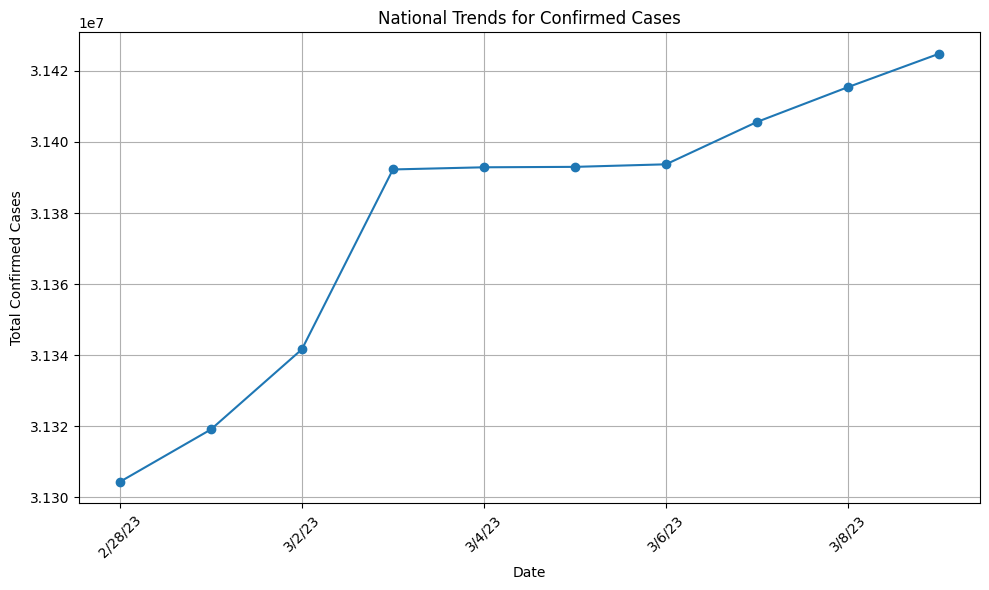

In [89]:
# Ploting national trends for confirmed cases
plt.figure(figsize=(10, 6))
national_confirmed_cases.sum().plot(marker='o', linestyle='-')
plt.title('National Trends for Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



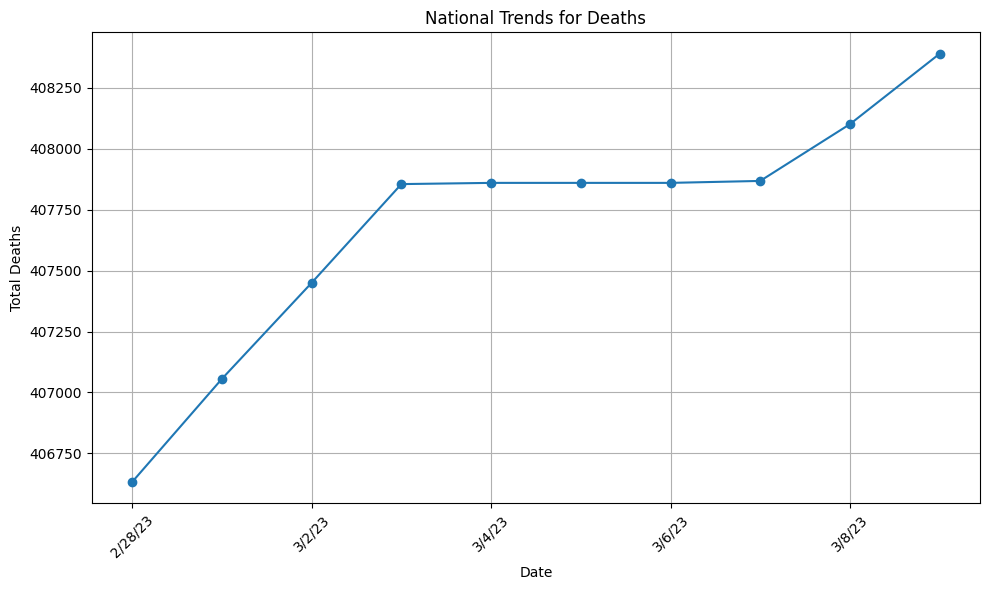

In [31]:
# Ploting national trends for deaths
plt.figure(figsize=(10, 6))
national_deaths.sum().plot(marker='o', linestyle='-')
plt.title('National Trends for Deaths')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


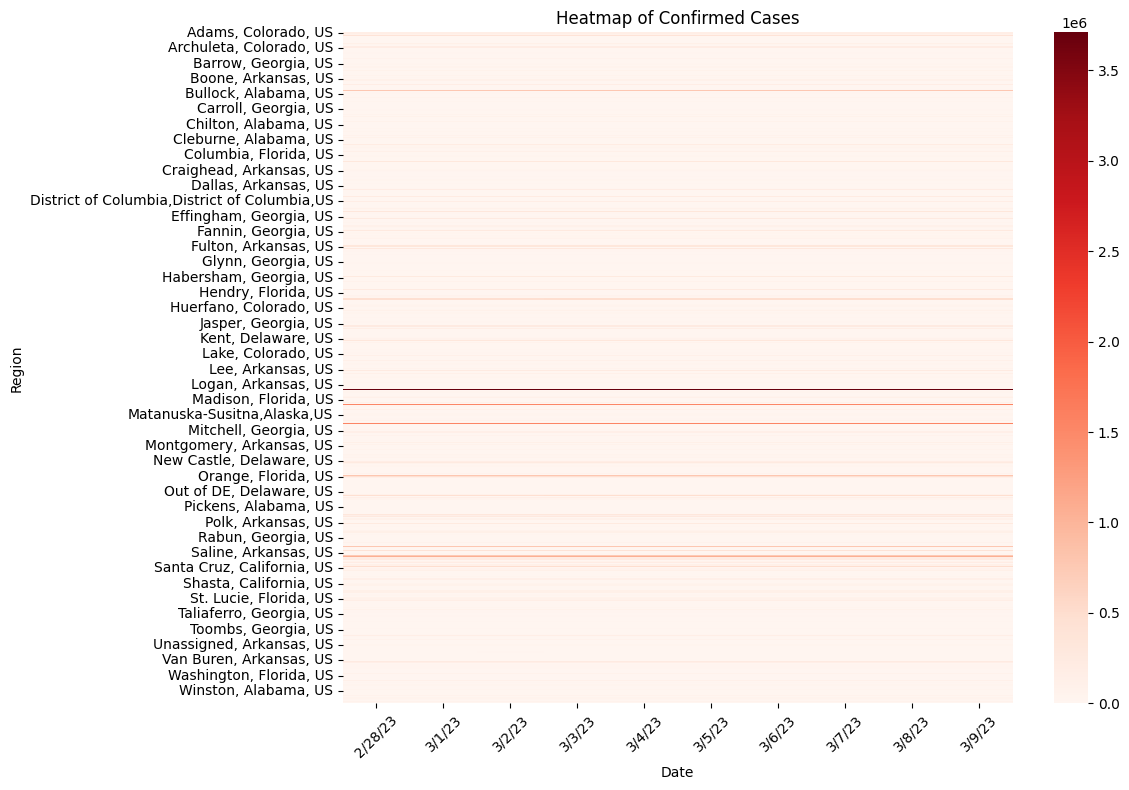

In [33]:
# Ploting heatmap for confirmed cases with 'Reds' colormap
plt.figure(figsize=(12, 8))
sns.heatmap(national_confirmed_cases, cmap='Reds')
plt.title('Heatmap of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


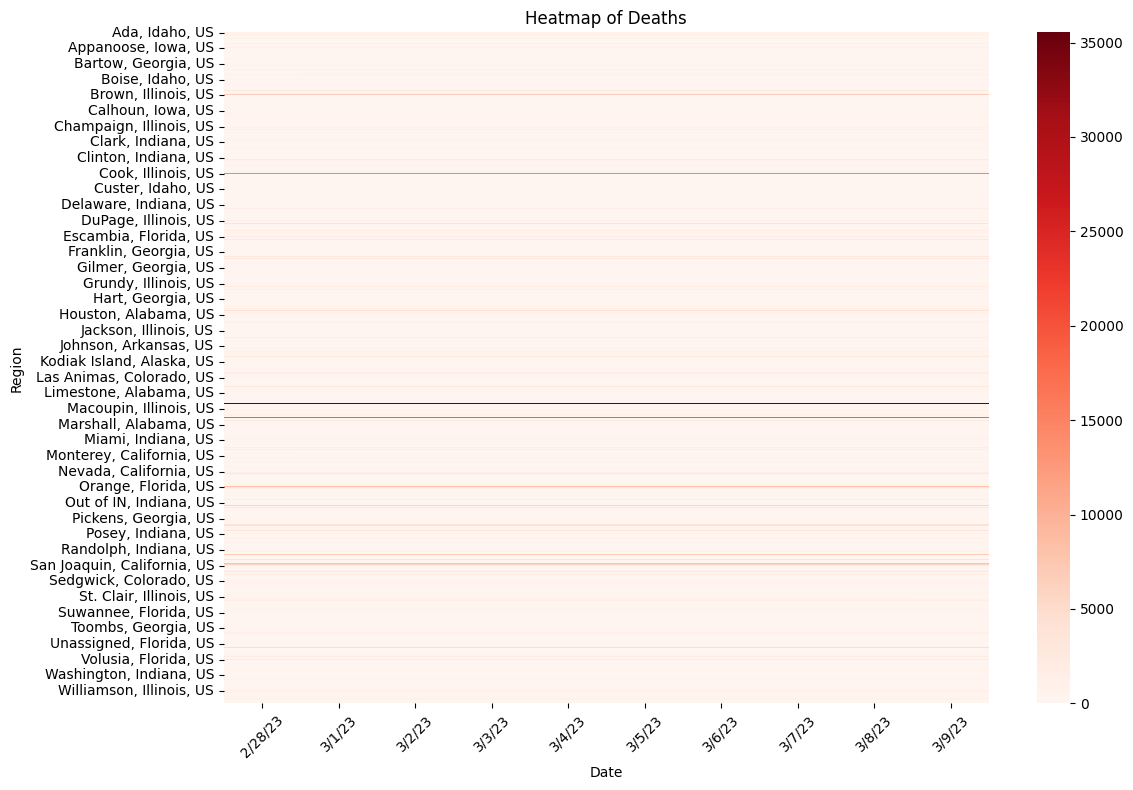

In [34]:
# Ploting heatmap for deaths with 'Reds' colormap
plt.figure(figsize=(12, 8))
sns.heatmap(national_deaths, cmap='Reds')
plt.title('Heatmap of Deaths')
plt.xlabel('Date')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


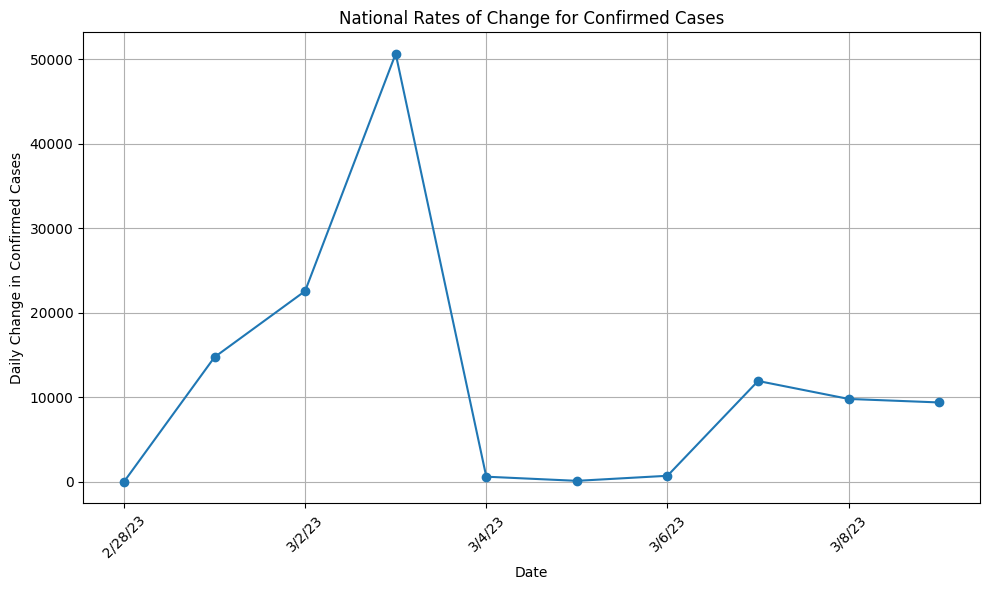

In [35]:
# Calculating daily changes in confirmed cases
daily_confirmed_changes = national_confirmed_cases.diff(axis=1)

# Ploting national rates of change for confirmed cases
plt.figure(figsize=(10, 6))
daily_confirmed_changes.sum().plot(marker='o', linestyle='-')
plt.title('National Rates of Change for Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Daily Change in Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

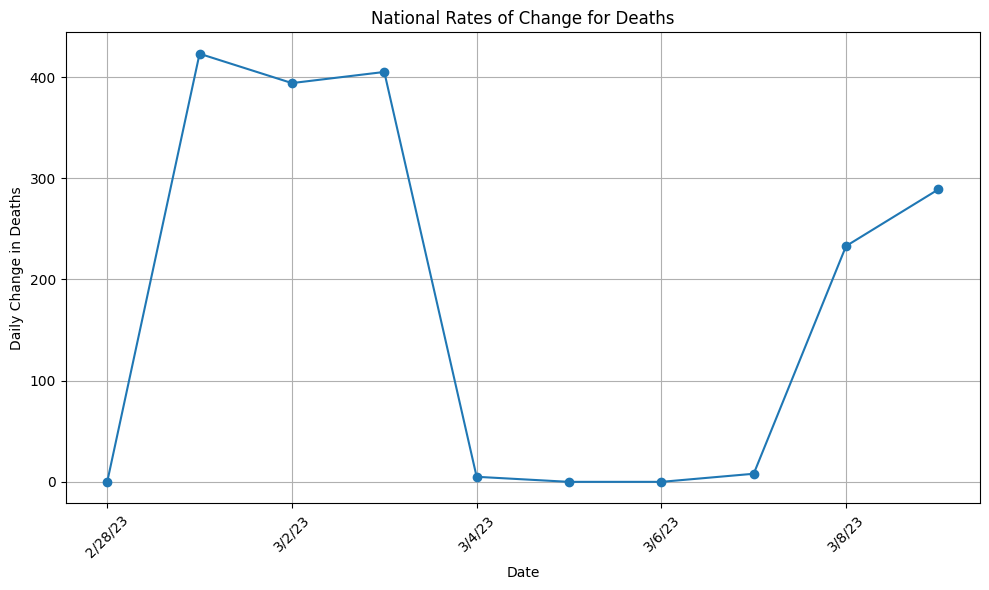

In [36]:
# Calculating daily changes in deaths
daily_death_changes = national_deaths.diff(axis=1)

# Ploting national rates of change for deaths
plt.figure(figsize=(10, 6))
daily_death_changes.sum().plot(marker='o', linestyle='-')
plt.title('National Rates of Change for Deaths')
plt.xlabel('Date')
plt.ylabel('Daily Change in Deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Country level:

In [38]:
merged_df.columns


Index(['Combined_Key', 'Admin2_confirmed', 'Province_State_confirmed',
       'Country_Region_confirmed', '2/28/23_confirmed', '3/1/23_confirmed',
       '3/2/23_confirmed', '3/3/23_confirmed', '3/4/23_confirmed',
       '3/5/23_confirmed', '3/6/23_confirmed', '3/7/23_confirmed',
       '3/8/23_confirmed', '3/9/23_confirmed', 'Admin2_deaths',
       'Province_State_deaths', 'Country_Region_deaths', '2/28/23_deaths',
       '3/1/23_deaths', '3/2/23_deaths', '3/3/23_deaths', '3/4/23_deaths',
       '3/5/23_deaths', '3/6/23_deaths', '3/7/23_deaths', '3/8/23_deaths',
       '3/9/23_deaths'],
      dtype='object')

In [39]:
# unique counties from the merged DataFrame
unique_counties_confirmed = merged_df['Admin2_confirmed'].unique()
unique_counties_deaths = merged_df['Admin2_deaths'].unique()

# Display of the unique counties
print("Unique counties in confirmed cases data:", unique_counties_confirmed)
print("Unique counties in deaths data:", unique_counties_deaths)



Unique counties in confirmed cases data: ['Autauga' 'Baldwin' 'Barbour' 'Bibb' 'Blount' 'Bullock' 'Butler'
 'Calhoun' 'Chambers' 'Cherokee' 'Chilton' 'Choctaw' 'Clarke' 'Clay'
 'Cleburne' 'Coffee' 'Colbert' 'Conecuh' 'Coosa' 'Covington' 'Crenshaw'
 'Cullman' 'Dale' 'Dallas' 'DeKalb' 'Elmore' 'Escambia' 'Etowah' 'Fayette'
 'Franklin' 'Geneva' 'Greene' 'Hale' 'Henry' 'Houston' 'Jackson'
 'Jefferson' 'Lamar' 'Lauderdale' 'Lawrence' 'Lee' 'Limestone' 'Lowndes'
 'Macon' 'Madison' 'Marengo' 'Marion' 'Marshall' 'Mobile' 'Monroe'
 'Montgomery' 'Morgan' 'Out of AL' 'Perry' 'Pickens' 'Pike' 'Randolph'
 'Russell' 'Shelby' 'St. Clair' 'Sumter' 'Talladega' 'Tallapoosa'
 'Tuscaloosa' 'Unassigned' 'Walker' 'Washington' 'Wilcox' 'Winston'
 'Aleutians East' 'Aleutians West' 'Anchorage' 'Bethel' 'Bristol Bay'
 'Bristol Bay plus Lake and Peninsula' 'Chugach' 'Copper River' 'Denali'
 'Dillingham' 'Fairbanks North Star' 'Haines' 'Hoonah-Angoon' 'Juneau'
 'Kenai Peninsula' 'Ketchikan Gateway' 'Kodiak Island

In [40]:
# List of counties of interest
counties_of_interest = ['San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo']

# Filterring the merged DataFrame for counties of interest
counties_df = merged_df[merged_df['Admin2_confirmed'].isin(counties_of_interest)]

# Displaying the filtered DataFrame
print(counties_df)


                        Combined_Key Admin2_confirmed  \
234        San Diego, California, US        San Diego   
235    San Francisco, California, US    San Francisco   
236      San Joaquin, California, US      San Joaquin   
237  San Luis Obispo, California, US  San Luis Obispo   
238        San Mateo, California, US        San Mateo   

    Province_State_confirmed Country_Region_confirmed  2/28/23_confirmed  \
234               California                       US          1064093.0   
235               California                       US           209253.0   
236               California                       US           226601.0   
237               California                       US            74520.0   
238               California                       US           194128.0   

     3/1/23_confirmed  3/2/23_confirmed  3/3/23_confirmed  3/4/23_confirmed  \
234         1064093.0         1065953.0         1066237.0         1066237.0   
235          209253.0          209253.0   

In [59]:
# Grouping data by region (county)
grouped_counties_df = counties_df.groupby('Admin2_confirmed').sum()


<ipython-input-59-76e1a35228f8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_counties_df = counties_df.groupby('Admin2_confirmed').sum()


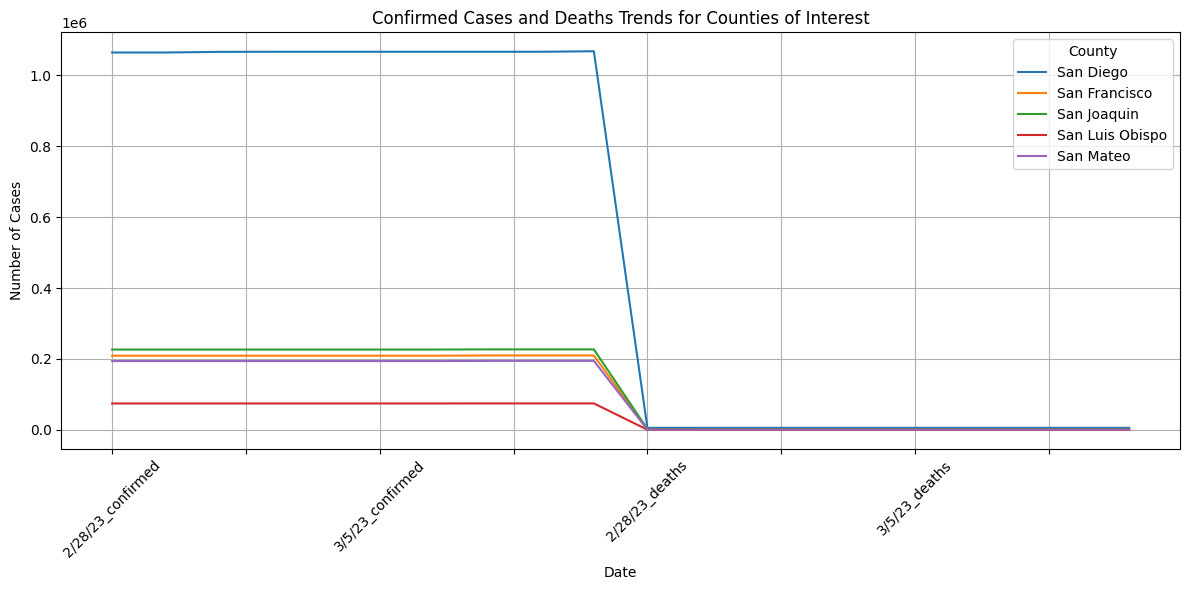

In [60]:
# Visualizing the trends using line plots
grouped_counties_df.T.plot(figsize=(12, 6))
plt.title('Confirmed Cases and Deaths Trends for Counties of Interest')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='County')
plt.tight_layout()
plt.show()

In [61]:
# Calculating regional rates of change for confirmed cases
regional_confirmed_rates = counties_df.set_index('Combined_Key')[['2/28/23_confirmed', '3/1/23_confirmed', '3/2/23_confirmed', '3/3/23_confirmed', '3/4/23_confirmed', '3/5/23_confirmed', '3/6/23_confirmed', '3/7/23_confirmed', '3/8/23_confirmed', '3/9/23_confirmed']].diff(axis=1) / counties_df.set_index('Combined_Key')[['2/28/23_confirmed', '3/1/23_confirmed', '3/2/23_confirmed', '3/3/23_confirmed', '3/4/23_confirmed', '3/5/23_confirmed', '3/6/23_confirmed', '3/7/23_confirmed', '3/8/23_confirmed', '3/9/23_confirmed']].iloc[:, :-1]

# Calculating regional rates of change for deaths
regional_deaths_rates = counties_df.set_index('Combined_Key')[['2/28/23_deaths', '3/1/23_deaths', '3/2/23_deaths', '3/3/23_deaths', '3/4/23_deaths', '3/5/23_deaths', '3/6/23_deaths', '3/7/23_deaths', '3/8/23_deaths', '3/9/23_deaths']].diff(axis=1) / counties_df.set_index('Combined_Key')[['2/28/23_deaths', '3/1/23_deaths', '3/2/23_deaths', '3/3/23_deaths', '3/4/23_deaths', '3/5/23_deaths', '3/6/23_deaths', '3/7/23_deaths', '3/8/23_deaths', '3/9/23_deaths']].iloc[:, :-1]


<ipython-input-62-b8dc8dcaa0c0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_confirmed = counties_df.filter(like='_confirmed').groupby('Admin2_confirmed').sum()


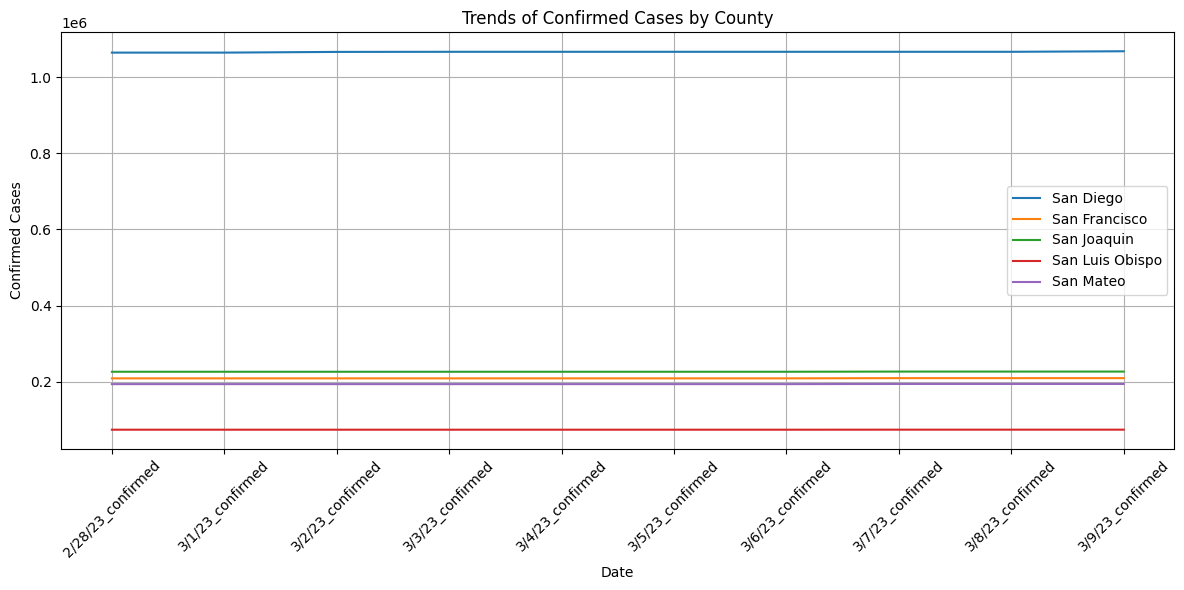

In [62]:
# Grouping data by region and date for confirmed cases
grouped_confirmed = counties_df.filter(like='_confirmed').groupby('Admin2_confirmed').sum()

# Plotting trends for confirmed cases
plt.figure(figsize=(12, 6))
for county in counties_of_interest:
    plt.plot(grouped_confirmed.loc[county], label=county)

plt.title('Trends of Confirmed Cases by County')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-63-eb2565e0bf6e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_deaths = counties_df.filter(like='_deaths').groupby('Admin2_deaths').sum()


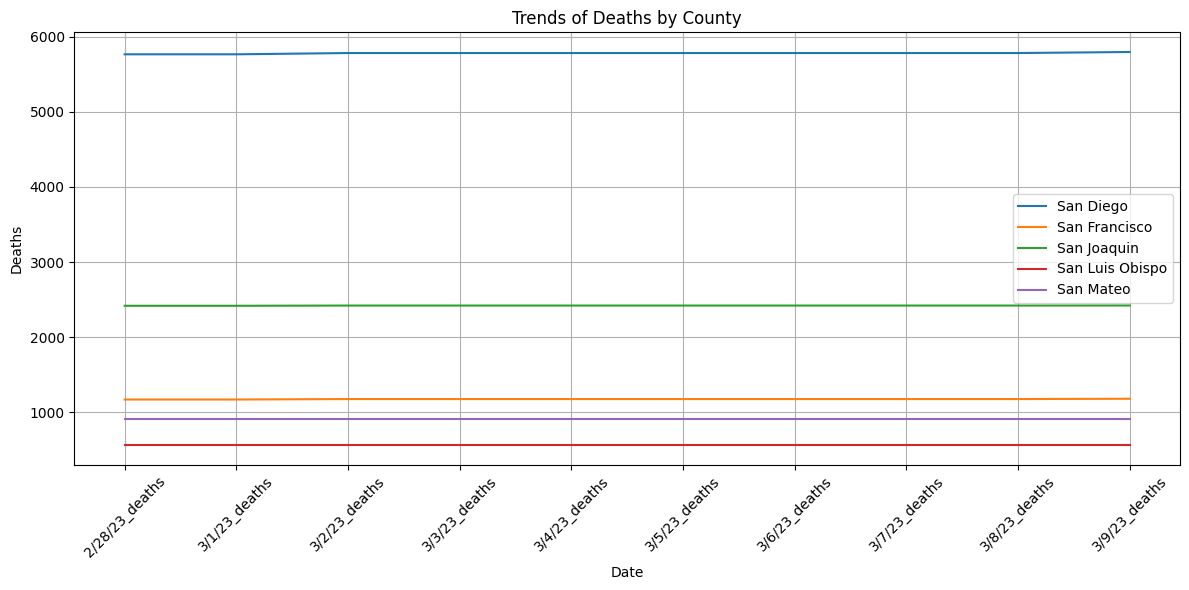

In [63]:
# Grouping data by region and date for deaths
grouped_deaths = counties_df.filter(like='_deaths').groupby('Admin2_deaths').sum()

# Plotting trends for deaths
plt.figure(figsize=(12, 6))
for county in counties_of_interest:
    plt.plot(grouped_deaths.loc[county], label=county)

plt.title('Trends of Deaths by County')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

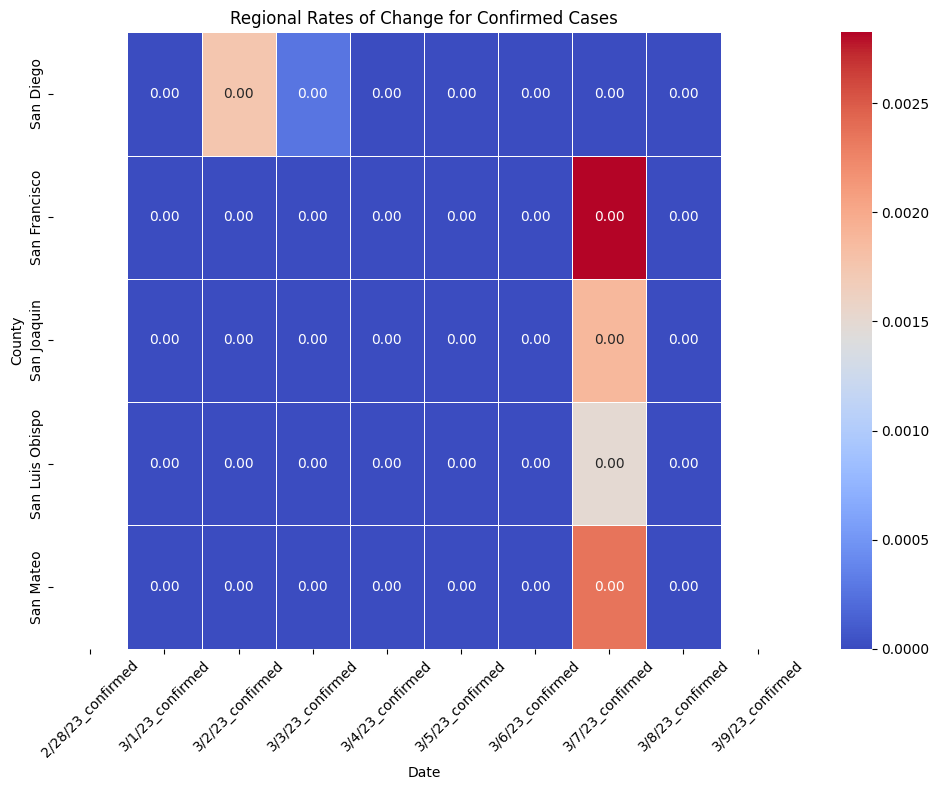

In [64]:
# Calculation of regional rates of change for confirmed cases
regional_confirmed_rates = grouped_confirmed.diff(axis=1) / grouped_confirmed.iloc[:, :-1]

# heatmap for confirmed cases rates of change
plt.figure(figsize=(10, 8))
sns.heatmap(regional_confirmed_rates, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Regional Rates of Change for Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

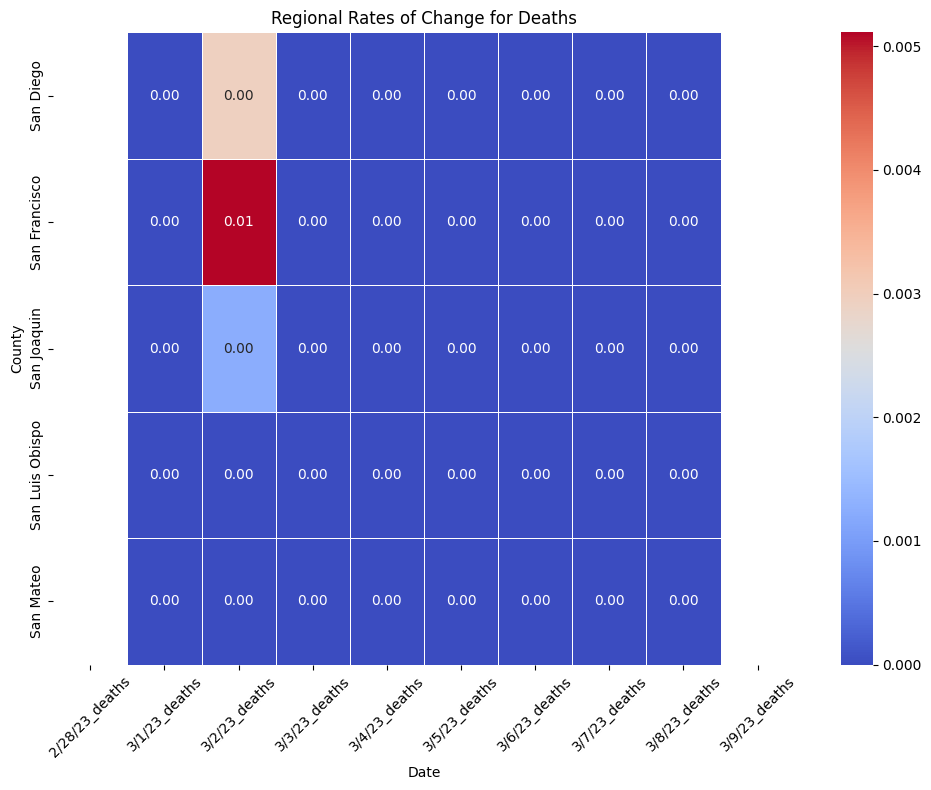

In [65]:
 #Calculating regional rates of change for deaths
regional_deaths_rates = grouped_deaths.diff(axis=1) / grouped_deaths.iloc[:, :-1]

# heatmap for deaths rates of change
plt.figure(figsize=(10, 8))
sns.heatmap(regional_deaths_rates, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Regional Rates of Change for Deaths')
plt.xlabel('Date')
plt.ylabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [97]:
unique_regions = merged_df['Province_State_deaths'].unique()
print(unique_regions)


['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia']


In [128]:
# column containing region information
arizona_daily_deaths_df = merged_df[merged_df['Province_State_deaths'] == 'Arizona']

# Selecting the columns for the time series data
arizona_daily_deaths_columns = ['2/28/23_deaths', '3/1/23_deaths', '3/2/23_deaths', '3/3/23_deaths', '3/4/23_deaths',
                                '3/5/23_deaths', '3/6/23_deaths', '3/7/23_deaths', '3/8/23_deaths', '3/9/23_deaths']

# Extracting the daily confirmed deaths data for Arizona
arizona_daily_deaths_data = arizona_daily_deaths_df[arizona_daily_deaths_columns].values.flatten()

# Creating a DataFrame for the daily confirmed deaths data in Arizona
arizona_daily_deaths_df = pd.DataFrame(arizona_daily_deaths_data, columns=['Daily_Deaths'])


In [102]:
# Performing Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

# time series data for daily confirmed deaths in Arizona
arizona_daily_deaths = arizona_daily_deaths_df.values.flatten()

# Perform Dickey-Fuller test
result = adfuller(arizona_daily_deaths)

# Printing the test result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -2.4969781260384836
p-value: 0.11621131171695126
Critical Values:
	1%: -3.472161410886292
	5%: -2.8798954259680936
	10%: -2.5765565828092245


In [104]:
import pandas as pd

# Converting the NumPy array to a pandas Series
arizona_daily_deaths_series = pd.Series(arizona_daily_deaths)

# Applying differencing to the time series data if necessary
arizona_daily_deaths_diff = arizona_daily_deaths_series.diff().dropna()


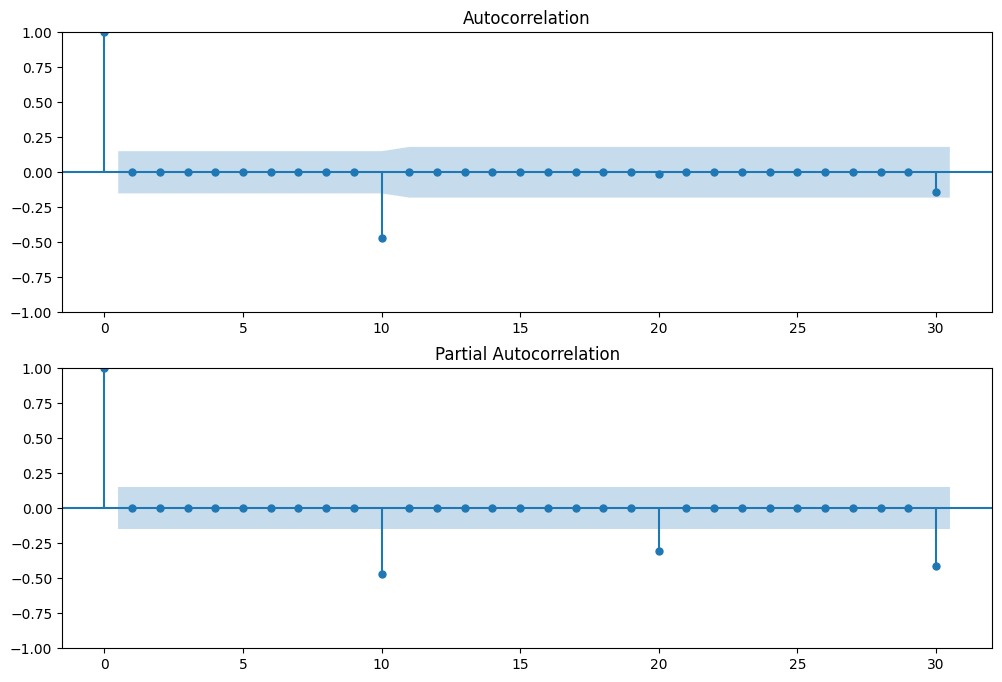

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ploting ACF and PACF plots for the differenced time series data
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(arizona_daily_deaths_diff, ax=axes[0], lags=30)
plot_pacf(arizona_daily_deaths_diff, ax=axes[1], lags=30)
plt.show()


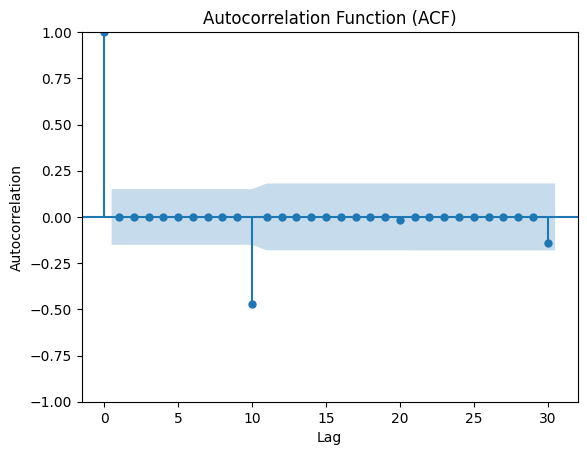

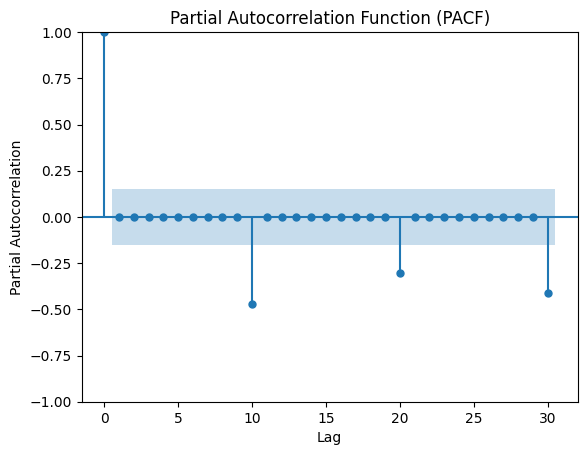

In [106]:
# Ploting ACF
plot_acf(arizona_daily_deaths_diff, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Ploting PACF
plot_pacf(arizona_daily_deaths_diff, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [107]:
# Training ARIMA model on the training set
arima_model = ARIMA(arizona_daily_deaths_diff, order=(1, 1, 1))
arima_result = arima_model.fit()

# The summary of the model
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1517.821
Date:                Sun, 10 Mar 2024   AIC                           3041.642
Time:                        10:31:23   BIC                           3051.014
Sample:                             0   HQIC                          3045.446
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0038      0.614      0.006      0.995      -1.200       1.207
ma.L1         -1.0000      0.019    -52.216      0.000      -1.038      -0.962
sigma2      4.013e+06   5.02e-09      8e+14      0.0

In [115]:
#Evaluating performance of the ARIMA model

# Step 1: Make predictions on the training data
predictions = arima_result.predict()

In [116]:
# Step 2: Calculating Mean Absolute Percentage Error (MAPE)
actual_values = arizona_daily_deaths_diff
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): inf


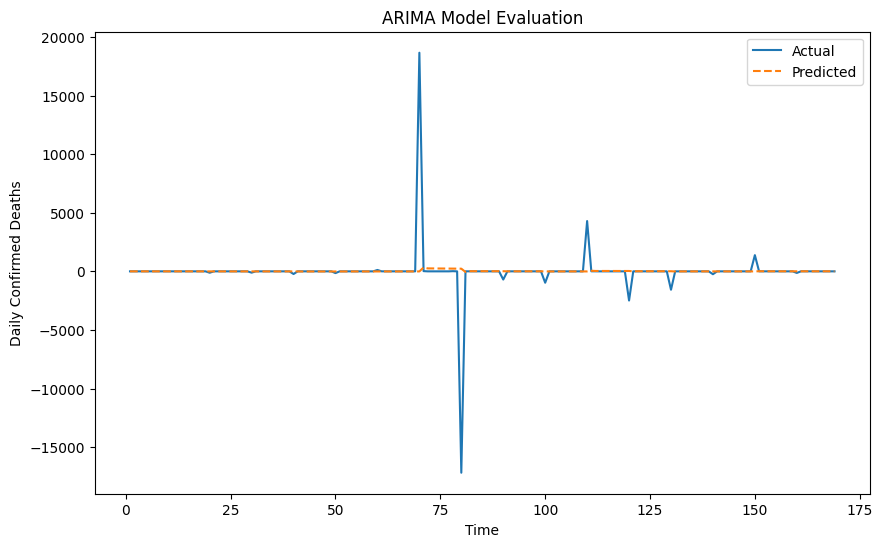

In [117]:
# Step 3: Ploting actual vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Daily Confirmed Deaths')
plt.title('ARIMA Model Evaluation')
plt.legend()
plt.show()

In [118]:
# Forecasting future values
forecast_steps = 30  # Number of steps to forecast into the future
forecast = arima_result.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted values for the next {} days:".format(forecast_steps))
print(forecast)


Forecasted values for the next 30 days:
169    3.625572
170    3.639345
171    3.639397
172    3.639397
173    3.639397
174    3.639397
175    3.639397
176    3.639397
177    3.639397
178    3.639397
179    3.639397
180    3.639397
181    3.639397
182    3.639397
183    3.639397
184    3.639397
185    3.639397
186    3.639397
187    3.639397
188    3.639397
189    3.639397
190    3.639397
191    3.639397
192    3.639397
193    3.639397
194    3.639397
195    3.639397
196    3.639397
197    3.639397
198    3.639397
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# LSTM

In [193]:
arizona_data.columns

Index(['Combined_Key', 'Admin2_confirmed', 'Province_State_confirmed',
       'Country_Region_confirmed', '2/28/23_confirmed', '3/1/23_confirmed',
       '3/2/23_confirmed', '3/3/23_confirmed', '3/4/23_confirmed',
       '3/5/23_confirmed', '3/6/23_confirmed', '3/7/23_confirmed',
       '3/8/23_confirmed', '3/9/23_confirmed', 'Admin2_deaths',
       'Province_State_deaths', 'Country_Region_deaths', '2/28/23_deaths',
       '3/1/23_deaths', '3/2/23_deaths', '3/3/23_deaths', '3/4/23_deaths',
       '3/5/23_deaths', '3/6/23_deaths', '3/7/23_deaths', '3/8/23_deaths',
       '3/9/23_deaths'],
      dtype='object')

In [194]:
unique_values = arizona_data['Province_State_deaths'].unique()
print(unique_values)


['Arizona']


In [195]:
# Filterring the DataFrame for rows where Province_State is 'Arizona'
arizona_data = merged_df[merged_df['Province_State_deaths'] == 'Arizona']


In [196]:
# Filtering the DataFrame for rows where Province_State is 'Arizona'
arizona_data = merged_df[merged_df['Province_State_deaths'] == 'Arizona']

# Converting the 'Province_State_deaths' column to a NumPy array
data_array = arizona_data['Province_State_deaths'].values

# Defining the sequence length (number of time steps)
sequence_length = 7  # using the past 7 days for prediction

# Reshaping the data into input sequences and target values
X = []
y = []
for i in range(len(data_array) - sequence_length):
    X.append(data_array[i:i+sequence_length])  # input sequence of length 7
    y.append(data_array[i+sequence_length])   # target value (next day's value)

# Converting the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Reshaping X to have dimensions (number of samples, sequence length, number of features)
X = X.reshape(-1, sequence_length, 1)  # 1 feature (daily deaths)


In [201]:
# Filtering the DataFrame for rows where Province_State_deaths is 'Arizona'
arizona_data = merged_df[merged_df['Province_State_deaths'] == 'Arizona']

# Aggregating the deaths data across all dates
arizona_deaths = arizona_data.filter(regex='_deaths$').sum(axis=1)

# Displaying the aggregated deaths data
print("Aggregated deaths data for Arizona:")
print(arizona_deaths)


Aggregated deaths data for Arizona:
103      6390.0
104      6430.0
105      5260.0
106      4150.0
107      1889.0
108       400.0
109      1589.0
110    188321.0
111     16672.0
112      9709.0
113         0.0
114     42973.0
115     18132.0
116      2450.0
117         0.0
118     13854.0
119     12559.0
dtype: float64


<ipython-input-201-01089f9152d9>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  arizona_deaths = arizona_data.filter(regex='_deaths$').sum(axis=1)


In [202]:
import numpy as np

# Defining the sequence length (number of time steps)
sequence_length = 7  # using the past 7 days for prediction

# Converting the aggregated deaths data to a NumPy array
data_array = arizona_deaths.values

# Reshaping the data into input sequences and target values
X = []
y = []
for i in range(len(data_array) - sequence_length):
    X.append(data_array[i:i+sequence_length])  # input sequence of length 7
    y.append(data_array[i+sequence_length])   # target value (next day's value)

# Converting the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Reshaping X to have dimensions (number of samples, sequence length, number of features)
X = X.reshape(-1, sequence_length, 1)  # 1 feature (daily deaths)

# Printing the shape and contents of X and y after preprocessing
print("Shape of X after preprocessing:", X.shape)
print("Shape of y after preprocessing:", y.shape)
print("Contents of X after preprocessing:")
print(X)


Shape of X after preprocessing: (10, 7, 1)
Shape of y after preprocessing: (10,)
Contents of X after preprocessing:
[[[  6390.]
  [  6430.]
  [  5260.]
  [  4150.]
  [  1889.]
  [   400.]
  [  1589.]]

 [[  6430.]
  [  5260.]
  [  4150.]
  [  1889.]
  [   400.]
  [  1589.]
  [188321.]]

 [[  5260.]
  [  4150.]
  [  1889.]
  [   400.]
  [  1589.]
  [188321.]
  [ 16672.]]

 [[  4150.]
  [  1889.]
  [   400.]
  [  1589.]
  [188321.]
  [ 16672.]
  [  9709.]]

 [[  1889.]
  [   400.]
  [  1589.]
  [188321.]
  [ 16672.]
  [  9709.]
  [     0.]]

 [[   400.]
  [  1589.]
  [188321.]
  [ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]]

 [[  1589.]
  [188321.]
  [ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]]

 [[188321.]
  [ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]
  [  2450.]]

 [[ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]
  [  2450.]
  [     0.]]

 [[  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]
  [  2450.]
  [     0.]
  [ 13854.]]]


In [204]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8, 7, 1)
Shape of y_train: (8,)
Shape of X_test: (2, 7, 1)
Shape of y_test: (2,)


In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Defining LSTM model architecture
model = Sequential([
    LSTM(units=50, input_shape=(sequence_length, 1)),
    Dense(units=1)
])



In [207]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')




In [208]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# INSIGHTS GENERATION

In [209]:
# Checking the shape of X
print("Shape of X after preprocessing:", X.shape)

# Print the contents of X
print("Contents of X after preprocessing:")
print(X)

# Using the trained LSTM model to forecast future deaths
forecast_steps = 30  # Number of steps to forecast into the future
forecast = model.predict(X[-forecast_steps:])  # Forecast future values

# Printing the forecasted values
print("Forecasted values for the next 30 days:")
print(forecast)


Shape of X after preprocessing: (10, 7, 1)
Contents of X after preprocessing:
[[[  6390.]
  [  6430.]
  [  5260.]
  [  4150.]
  [  1889.]
  [   400.]
  [  1589.]]

 [[  6430.]
  [  5260.]
  [  4150.]
  [  1889.]
  [   400.]
  [  1589.]
  [188321.]]

 [[  5260.]
  [  4150.]
  [  1889.]
  [   400.]
  [  1589.]
  [188321.]
  [ 16672.]]

 [[  4150.]
  [  1889.]
  [   400.]
  [  1589.]
  [188321.]
  [ 16672.]
  [  9709.]]

 [[  1889.]
  [   400.]
  [  1589.]
  [188321.]
  [ 16672.]
  [  9709.]
  [     0.]]

 [[   400.]
  [  1589.]
  [188321.]
  [ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]]

 [[  1589.]
  [188321.]
  [ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]]

 [[188321.]
  [ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]
  [  2450.]]

 [[ 16672.]
  [  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]
  [  2450.]
  [     0.]]

 [[  9709.]
  [     0.]
  [ 42973.]
  [ 18132.]
  [  2450.]
  [     0.]
  [ 13854.]]]
1/1 [==============================] - 1s 785ms/step
Forecaste

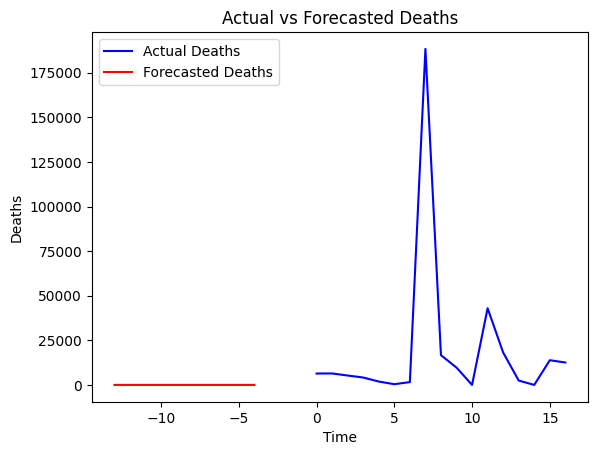

In [211]:
# Plotting the actual data
plt.plot(data_array, label='Actual Deaths', color='blue')

# Plotting the forecasted values
forecast_range = range(len(data_array) - forecast_steps, len(data_array) - forecast_steps + len(forecast))
plt.plot(forecast_range, forecast, label='Forecasted Deaths', color='red')

# Setting plot labels and title
plt.xlabel('Time')
plt.ylabel('Deaths')
plt.title('Actual vs Forecasted Deaths')

# Adding a legend
plt.legend()

# Showing plot
plt.show()


In [212]:
merged_df.columns


Index(['Combined_Key', 'Admin2_confirmed', 'Province_State_confirmed',
       'Country_Region_confirmed', '2/28/23_confirmed', '3/1/23_confirmed',
       '3/2/23_confirmed', '3/3/23_confirmed', '3/4/23_confirmed',
       '3/5/23_confirmed', '3/6/23_confirmed', '3/7/23_confirmed',
       '3/8/23_confirmed', '3/9/23_confirmed', 'Admin2_deaths',
       'Province_State_deaths', 'Country_Region_deaths', '2/28/23_deaths',
       '3/1/23_deaths', '3/2/23_deaths', '3/3/23_deaths', '3/4/23_deaths',
       '3/5/23_deaths', '3/6/23_deaths', '3/7/23_deaths', '3/8/23_deaths',
       '3/9/23_deaths'],
      dtype='object')

<ipython-input-218-aac8f76e0d9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arizona_data.loc[:, 'Province_State_deaths'] = pd.to_numeric(arizona_data['Province_State_deaths'], errors='coerce')
<ipython-input-218-aac8f76e0d9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arizona_data.loc[:, 'Rate_of_Increase'] = arizona_data['Province_State_deaths'].diff()


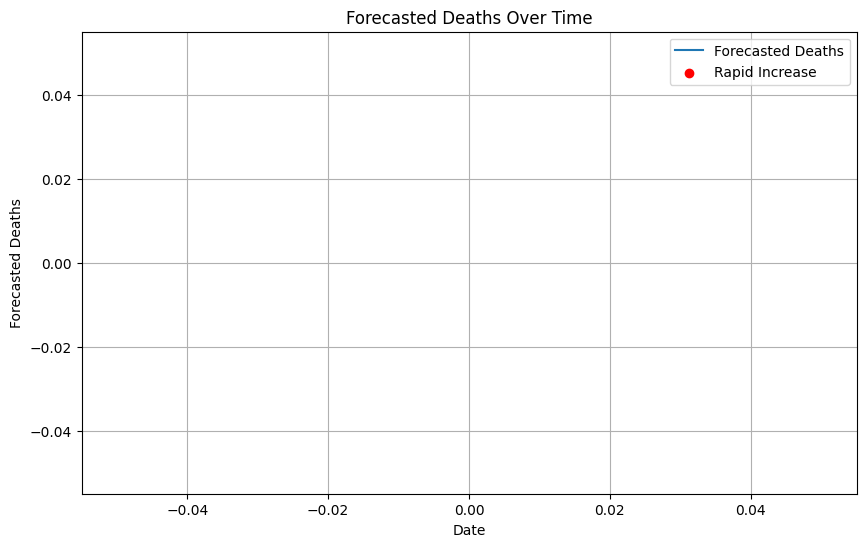

In [218]:
# Converting 'Province_State_deaths' column to numeric
arizona_data.loc[:, 'Province_State_deaths'] = pd.to_numeric(arizona_data['Province_State_deaths'], errors='coerce')

# Calculating rate of increase
arizona_data.loc[:, 'Rate_of_Increase'] = arizona_data['Province_State_deaths'].diff()

# Plotting forecasted values
plt.figure(figsize=(10, 6))
plt.plot(arizona_data.index, arizona_data['Province_State_deaths'], label='Forecasted Deaths')

# Highlighting regions with rapid increases
rapid_increase_threshold = 10  # Define a threshold for rapid increase
rapid_increase_regions = arizona_data[arizona_data['Rate_of_Increase'] > rapid_increase_threshold]['Combined_Key'].unique()
plt.scatter(arizona_data[arizona_data['Combined_Key'].isin(rapid_increase_regions)].index,
            arizona_data[arizona_data['Combined_Key'].isin(rapid_increase_regions)]['Province_State_deaths'],
            color='red', label='Rapid Increase')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Forecasted Deaths')
plt.title('Forecasted Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()
